The Street View House Numbers (SVHN) Dataset  
  
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.     

  Overview    The images come in two formats as shown below.    Format 1 : Original images with character level bounding boxes.  
  
  <XXXXXXXXX>
Format 2 : MNIST-like 32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).  
<XXXXXXXXXXXX>
  
  The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.     Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images  (42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).    


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/AIML/SVHN/'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('gdrive/My Drive/AIML/SVHN/')  #change dir

In [4]:
ls

SVHN_single_grey1.h5


In [5]:
import os
import time
from __future__ import absolute_import
from __future__ import print_function
from datetime import timedelta
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size

Using TensorFlow backend.


In [0]:
TENSORBOARD_SUMMARIES_DIR = '/tmp/svhn_classifier_logs'

<h3>Load SVHN dataset from a h5 file</h3>

In [83]:
# Open the file as read only
hdf = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and test set

X_train=hdf['X_train'][:]
y_train=hdf['y_train'][:]
X_test=hdf['X_test'][:]
y_test=hdf['y_test'][:]

# Close this file
hdf.close()

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [85]:
print(X_train.dtype)

float32


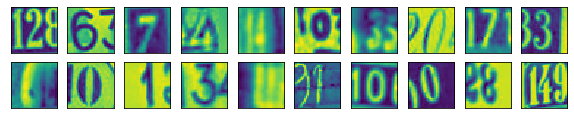

In [88]:
#Visualalize Dataset - Sample House Numbers from training dataset
fig = plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])

Resize train and test dataset ( from 32X32 to 28X28)

In [90]:
#Importing opencv module (for the resizing function)
import cv2

#Create a resized dataset for training and testing inputs with corresponding size. 
#Here we are resizing it to 28X28 (same input size as MNIST)
X_train_resized = np.zeros((X_train.shape[0],28,28), dtype=np.float32)
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_train_resized[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0],28,28), dtype=np.float32)
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
#We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
#del x_train
#del x_test

print(X_train_resized.shape)
print(X_test_resized.shape)


(42000, 28, 28)
(18000, 28, 28)


#Reshape train and test dataset 

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28


#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train1 = X_train_resized.reshape(X_train_resized.shape[0], img_rows, img_cols, 1)
X_test1 = X_test_resized.reshape(X_test_resized.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [94]:
X_train1[:0]

array([], shape=(0, 28, 28, 1), dtype=float32)

In [95]:
X_train1[0]

array([[[ 32.478947],
        [ 29.17887 ],
        [ 26.343634],
        [ 27.7792  ],
        [ 33.127647],
        [ 35.446476],
        [ 32.523952],
        [ 27.218805],
        [ 23.105398],
        [ 21.61668 ],
        [ 23.614103],
        [ 29.61328 ],
        [ 38.429916],
        [ 41.108994],
        [ 32.81807 ],
        [ 26.630198],
        [ 27.634872],
        [ 20.956554],
        [ 21.516186],
        [ 24.47948 ],
        [ 24.911707],
        [ 28.956184],
        [ 43.58853 ],
        [ 60.69125 ],
        [ 73.54636 ],
        [ 76.43171 ],
        [ 64.709274],
        [ 46.086235]],

       [[ 24.454548],
        [ 25.42928 ],
        [ 37.111088],
        [ 56.13835 ],
        [ 69.67341 ],
        [ 69.42908 ],
        [ 56.023132],
        [ 33.67825 ],
        [ 22.973448],
        [ 29.122887],
        [ 44.544098],
        [ 64.27325 ],
        [ 87.867035],
        [ 97.30989 ],
        [ 91.180374],
        [ 73.919815],
        [ 46.182213],
        

Normalize the dataset

In [96]:
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')

#Normalizing the input
X_train1 /= 255
X_test1 /= 255
print('X_train1 shape:', X_train1.shape)
print(X_train1.shape[0], 'train samples')
print(X_test1.shape[0], 'test samples')

X_train1 shape: (42000, 28, 28, 1)
42000 train samples
18000 test samples


In [97]:
print(X_train1.shape)
print(X_test1.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)


In [98]:
X_train1[0]

array([[[0.12736842],
        [0.11442694],
        [0.10330836],
        [0.10893804],
        [0.12991235],
        [0.1390058 ],
        [0.12754491],
        [0.10674042],
        [0.0906094 ],
        [0.0847713 ],
        [0.09260432],
        [0.11613051],
        [0.15070556],
        [0.16121174],
        [0.1286983 ],
        [0.10443215],
        [0.10837205],
        [0.08218256],
        [0.0843772 ],
        [0.09599797],
        [0.09769297],
        [0.11355367],
        [0.17093542],
        [0.23800491],
        [0.28841707],
        [0.29973218],
        [0.25376186],
        [0.18073033]],

       [[0.09590019],
        [0.09972266],
        [0.14553368],
        [0.2201504 ],
        [0.27322906],
        [0.2722709 ],
        [0.21969856],
        [0.13207157],
        [0.09009195],
        [0.1142074 ],
        [0.17468274],
        [0.25205195],
        [0.3445766 ],
        [0.3816074 ],
        [0.35757008],
        [0.28988162],
        [0.18110672],
        

In [99]:
y_train.shape

(42000,)

Convert labels in One Hot Vector

In [0]:
import keras
# convert class vectors to binary class matrices
y_train1 = keras.utils.to_categorical(y_train, num_classes=10)
y_test1 = keras.utils.to_categorical(y_test, num_classes=10)

In [101]:
y_train1.shape

(42000, 10)

In [102]:
y_train1[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Building the model/CNN

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
num_classes = 10

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.3 probability 
model.add(Dropout(0.3,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

<h4>Setting Optimizer and Loss function for training</h4>

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.01
optimizer = Adam(lr=0.01)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Training the model/CNN

Fit the model to the SVHN dataset

In [107]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 64)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
drop_2 (Dropout)             (None, 128)             

In [109]:
#Training on the dataset
model.fit(X_train1, y_train1,
          batch_size=300,
          epochs=10,
          verbose=1,
          validation_data=(X_test1, y_test1))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 110s 3ms/step - loss: 2.0344 - acc: 0.2850 - val_loss: 1.3952 - val_acc: 0.5608
Epoch 2/10
42000/42000 [==============================] - 108s 3ms/step - loss: 1.5072 - acc: 0.4946 - val_loss: 1.2135 - val_acc: 0.6256
Epoch 3/10
42000/42000 [==============================] - 105s 2ms/step - loss: 1.4133 - acc: 0.5263 - val_loss: 1.1280 - val_acc: 0.6548
Epoch 4/10
42000/42000 [==============================] - 106s 3ms/step - loss: 1.3712 - acc: 0.5412 - val_loss: 1.0919 - val_acc: 0.6629
Epoch 5/10
42000/42000 [==============================] - 105s 3ms/step - loss: 1.3250 - acc: 0.5543 - val_loss: 1.0740 - val_acc: 0.6782
Epoch 6/10
42000/42000 [==============================] - 104s 2ms/step - loss: 1.2891 - acc: 0.5650 - val_loss: 1.0151 - val_acc: 0.6909
Epoch 7/10
42000/42000 [==============================] - 104s 2ms/step - loss: 1.2430 - acc: 0.5793 - val_loss: 0.9423 - 

Evaluate the model/CNN

In [110]:
#Testing the model on test set
score = model.evaluate(X_test1, y_test1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 12s 678us/step
Test loss: 0.9484652708901299
Test accuracy: 0.7104444444444444


Visualize sample predictions

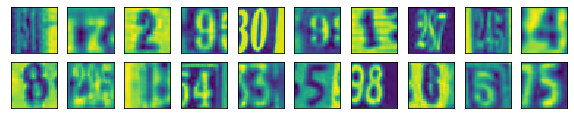

In [119]:
#Visualalize Dataset - Sample House Numbers from training dataset
fig = plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i])

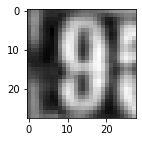

9


In [120]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test1[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test1[3].reshape(1,28,28,1))))


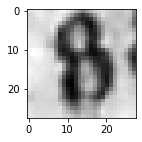

6


In [125]:

plt.figure(figsize=(2,2))
plt.imshow(X_test1[10].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test1[10].reshape(1,28,28,1))))